In [430]:
import os
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [389]:
directory = os.getcwd()
data_all = pd.read_csv(directory + '/input_data.csv', sep=',') 

In [390]:
#all columns
data_all.head()

,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,INCIDENT_RESPONSE_SECONDS_QY,INCIDENT_TRAVEL_TM_SECONDS_QY,HELD_INDICATOR,T0,T1,T3,T4,T5,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,5,4,740.0,736.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2,24,409.0,385.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5,15,596.0,581.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,29,501.0,472.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3,56,264.0,208.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


***INCLUDING IMPORTANT FEATURES ONLY***

In [391]:
#creating df with only important features
data = data_all[['INITIAL_SEVERITY_LEVEL_CODE', 'DISPATCH_RESPONSE_SECONDS_QY','HELD_INDICATOR', 'T0', 'T1', 'T4',\
                 'T5', 'T10', 'T12', 'T14', 'T15','T17', 'T21', 'T25', 'T27', 'T35', 'T37', '10457.0', '11207.0',\
                 'City_2.0', 'City_4.0', 'City_15.0', 'City_17.0', 'City_37.0','City_42.0', 'Comm_105.0', 'Schl_8.0',\
                 'Schl_9.0', 'Schl_10.0','Schl_27.0', 'Schl_28.0', 'Con_6.0', 'Con_7.0', 'Con_8.0', 'Con_9.0',\
                 'Con_10.0', 'Con_11.0', 'Con_12.0', 'Con_13.0', 'Con_14.0', 'Con_15.0','Day_0', 'Day_1', 'Day_2',\
                 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Hr_0','Hr_1', 'Hr_2', 'Hr_3', 'Hr_4', 'Hr_5', 'Hr_6', 'Hr_7', \
                 'Hr_8', 'Hr_9','Hr_10', 'Hr_11', 'Hr_12', 'Hr_13', 'Hr_14', 'Hr_15', 'Hr_16', 'Hr_17','Hr_18', \
                 'Hr_19', 'Hr_20', 'Hr_21', 'Hr_22', 'Hr_23', 'Month_1','Month_2', 'Month_3', 'Month_4', 'Month_5',\
                 'Month_6', 'Month_7','Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12','INCIDENT_TRAVEL_TM_SECONDS_QY']]

In [392]:
#df with features from feature selection
data.head()

,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,HELD_INDICATOR,T0,T1,T4,T5,T10,T12,T14,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,INCIDENT_TRAVEL_TM_SECONDS_QY
0,5,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,736.0
1,2,24,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,385.0
2,5,15,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,581.0
3,1,29,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,472.0
4,3,56,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,208.0


In [393]:
data.shape

(50000, 85)

***BINNING INCIDENT_TRAVEL_TM (DISCRETIZING)***

In [394]:
#bins; change n to change num of bins
n = 5 
max = 1025
bin_width = max/n #+1 because we have n bins so n+1 endpoints
bin_width

205.0

In [395]:
#bin ranges
bins = np.arange(0,max+bin_width,bin_width)
bins

array([   0.,  205.,  410.,  615.,  820., 1025.])

In [396]:
#labels for bin ranges
labels = list(range(1,n+1))
labels

[1, 2, 3, 4, 5]

In [397]:
#df to visualize bins
df = pd.DataFrame(data = labels)
df['start'] = bins[:bins.shape[0]-1]
df['end'] = bins[1:]
df

,0,start,end
0,1,0.0,205.0
1,2,205.0,410.0
2,3,410.0,615.0
3,4,615.0,820.0
4,5,820.0,1025.0


In [398]:
#coding continuous data based on bins/labels, removing continuous data cols
data['INCIDENT_TRAVEL_TM_SECONDS_QY_Bin'] = pd.cut(data['INCIDENT_TRAVEL_TM_SECONDS_QY'],bins,labels=labels)
data = data.drop(columns = ['INCIDENT_TRAVEL_TM_SECONDS_QY'])
data.head()

,INITIAL_SEVERITY_LEVEL_CODE,DISPATCH_RESPONSE_SECONDS_QY,HELD_INDICATOR,T0,T1,T4,T5,T10,T12,T14,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,INCIDENT_TRAVEL_TM_SECONDS_QY_Bin
0,5,4,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,4
1,2,24,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2
2,5,15,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,1,29,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
4,3,56,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2


In [399]:
import collections
from collections import Counter

In [400]:
travel_tm = collections.Counter(data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
travel_tm_count = sum(travel_tm.values())
travel_tm

Counter({4: 5700, 2: 22025, 3: 14376, 5: 2210, 1: 5689})

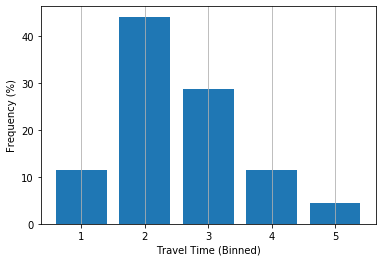

In [401]:
#visualize count of data within each bin
travel_tm = {k: (v*100) / travel_tm_count for k, v in travel_tm.items()} #mult by 100 to turn into percent
plt.bar(travel_tm.keys(),travel_tm.values())
plt.grid(axis = 'x')
plt.xlabel("Travel Time (Binned)")
plt.ylabel("Frequency (%)")
plt.show()

***BINNING DISPATCH RESPONSE TIME (DISCRETIZING)***

In [402]:
#bins; change n to change num of bins
n_r = 10 
max_r = 68
bin_width_r = max_r/n_r 
bin_width_r

6.8

In [403]:
#bin ranges
bins_r = np.arange(0,max_r+bin_width_r,bin_width_r)
bins_r

array([ 0. ,  6.8, 13.6, 20.4, 27.2, 34. , 40.8, 47.6, 54.4, 61.2, 68. ])

In [404]:
#labels for bin ranges
labels_r = list(range(1,n_r+1))
labels_r

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [405]:
#df to visualize bins
df = pd.DataFrame(data = labels_r)
df['start'] = bins_r[:bins_r.shape[0]-1]
df['end'] = bins_r[1:]
df

,0,start,end
0,1,0.0,6.8
1,2,6.8,13.6
2,3,13.6,20.4
3,4,20.4,27.2
4,5,27.2,34.0
5,6,34.0,40.8
6,7,40.8,47.6
7,8,47.6,54.4
8,9,54.4,61.2
9,10,61.2,68.0


In [406]:
#coding continuous data based on bins/labels, removing continuous data cols
data['DISPATCH_RESPONSE_SECONDS_QY_Bin'] = pd.cut(data['DISPATCH_RESPONSE_SECONDS_QY'],bins_r,labels=labels_r)
data = data.drop(columns = ['DISPATCH_RESPONSE_SECONDS_QY'])
data.head()

,INITIAL_SEVERITY_LEVEL_CODE,HELD_INDICATOR,T0,T1,T4,T5,T10,T12,T14,T15,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,INCIDENT_TRAVEL_TM_SECONDS_QY_Bin,DISPATCH_RESPONSE_SECONDS_QY_Bin
0,5,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,4,1
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,2,4
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,3,3
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,5
4,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,9


In [407]:
disp_tm = collections.Counter(data["DISPATCH_RESPONSE_SECONDS_QY_Bin"])
disp_tm_count = sum(disp_tm.values())
disp_tm

Counter({1: 4051,
         4: 6620,
         3: 11000,
         5: 4202,
         9: 1105,
         7: 2109,
         2: 15979,
         8: 1583,
         6: 2497,
         10: 854})

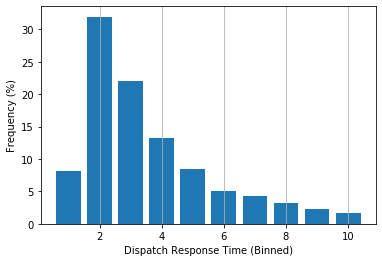

In [408]:
#visualize count of data within each bin
disp_tm = {k: (v*100) / disp_tm_count for k, v in disp_tm.items()} #mult by 100 to turn into percent
plt.bar(disp_tm.keys(),disp_tm.values())
plt.grid(axis = 'x')
plt.xlabel("Dispatch Response Time (Binned)")
plt.ylabel("Frequency (%)")
plt.show()

***SPLITTING TRAIN / TEST***

In [410]:
#X is predictors, Y is value to be predicted
X = data.drop(columns = ["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"])
Y = data["INCIDENT_TRAVEL_TM_SECONDS_QY_Bin"]

In [411]:
X.head()

,INITIAL_SEVERITY_LEVEL_CODE,HELD_INDICATOR,T0,T1,T4,T5,T10,T12,T14,T15,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DISPATCH_RESPONSE_SECONDS_QY_Bin
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,4
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5
4,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,9


In [413]:
Y.head()

0    4
1    2
2    3
3    3
4    2
Name: INCIDENT_TRAVEL_TM_SECONDS_QY_Bin, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [414]:
#splitting into training and testing datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

In [415]:
X_train.head()

,INITIAL_SEVERITY_LEVEL_CODE,HELD_INDICATOR,T0,T1,T4,T5,T10,T12,T14,T15,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DISPATCH_RESPONSE_SECONDS_QY_Bin
31812,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
31051,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
15179,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,7
44578,2,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,6
16264,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [416]:
Y_train.head()

31812    2
31051    4
15179    2
44578    2
16264    5
Name: INCIDENT_TRAVEL_TM_SECONDS_QY_Bin, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [417]:
X_test.head()

,INITIAL_SEVERITY_LEVEL_CODE,HELD_INDICATOR,T0,T1,T4,T5,T10,T12,T14,T15,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DISPATCH_RESPONSE_SECONDS_QY_Bin
44751,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,3
9400,5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
25895,2,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,4
16584,7,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,4
34859,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [418]:
Y_test.head()

44751    2
9400     4
25895    2
16584    2
34859    2
Name: INCIDENT_TRAVEL_TM_SECONDS_QY_Bin, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

***LINEAR DISCRIMINANT ANALYSIS***

In [409]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [419]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [420]:
lda.score(X_train,Y_train)

0.44512

In [421]:
lda.score(X_test,Y_test)

0.44064

In [427]:
Y_lda_predict = lda.predict(X_test)
Y_lda_predict

array([2, 2, 2, ..., 2, 3, 2])

***KNN***

In [422]:
from sklearn.neighbors import KNeighborsClassifier

In [423]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [424]:
knn.score(X_train, Y_train)

0.5579466666666667

In [425]:
knn.score(X_test, Y_test)

0.37584

In [433]:
Y_knn_predict = knn.predict(X_test)
Y_knn_predict

array([1, 2, 1, ..., 2, 2, 3])